# ECE 590, Fall 2019 
## Problem Set 2 

## Full name: Yifei Wang


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1 (Conditional Multivariate Gaussian Distribution)

#### Part (a). Mathematical Proof

We know that we have

$$
N(\mathbf x \mid \mathbf{\mu}, \mathbf{\Sigma}) = (2\pi)^{-D/2} \det(\mathbf{\Sigma})^{-1/2} \exp \left\{-\frac12(\mathbf{x}-\mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x}-\mathbf{\mu})\right\}
$$

Suppose we have $q = D - p$, and

$$
\mathbf{x} = \left(\begin{matrix} \mathbf{x}_p \\ \mathbf{x}_q \end{matrix}\right)
,\quad
\mathbf{\mu} = \left(\begin{matrix} \mathbf{\mu}_p \\ \mathbf{\mu}_q \end{matrix}\right)
,\quad
\mathbf{\Sigma} = \left( \begin{matrix} \mathbf{\Sigma}_{pp} & \mathbf{\Sigma}_{pq} \\ \mathbf{\Sigma}_{qp} & \mathbf{\Sigma}_{qq} \end{matrix} \right)
,\quad
\mathbf{\Lambda} = \mathbf{\Sigma}^{-1} = \left( \begin{matrix} \mathbf{\Lambda}_{pp} & \mathbf{\Lambda}_{pq} \\ \mathbf{\Lambda}_{qp} & \mathbf{\Lambda}_{qq} \end{matrix} \right)
$$

Taking only into account of the exponential terms, and by plugging thoes terms into it, we find that

$$
\begin{aligned}
-\frac12&(\mathbf{x}-\mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x}-\mathbf{\mu}) = \\
  & -\frac12(\mathbf{x}_p-\mathbf{\mu}_p)^T \mathbf{\Lambda}_{pp} (\mathbf{x}_p-\mathbf{\mu}_p) 
    -\frac12(\mathbf{x}_p-\mathbf{\mu}_p)^T \mathbf{\Lambda}_{pq} (\mathbf{x}_q-\mathbf{\mu}_q) \\
  & -\frac12(\mathbf{x}_q-\mathbf{\mu}_q)^T \mathbf{\Lambda}_{qp} (\mathbf{x}_p-\mathbf{\mu}_p) 
    -\frac12(\mathbf{x}_q-\mathbf{\mu}_q)^T \mathbf{\Lambda}_{qq} (\mathbf{x}_q-\mathbf{\mu}_q) 
\end{aligned}
$$

this is again a quadratic form funciton of $\mathbf{x}_q$. This shows that the conditional multivariate Gaussian distribution is still a Gaussian distribution. Thus we only need to compute its mean and variance to fully understand the whole analytic form of this conditional distribution.

According to the slides in class, we have

$$
p(\mathbf{x}_q \mid \mathbf{x}_p = \mathbf{a}) = \mathcal N(\mathbf{x}_q \mid \mathbf{\mu}_{q|p}, \mathbf{\Sigma}_{q|p})
$$

where

$$
\begin{aligned}
\mathbf{\mu}_{q|p} 
  &= \mathbf{\mu}_q + \mathbf{\Sigma}_{qp} \mathbf{\Sigma}_{pp}^{-1} (\mathbf{x}_p - \mathbf{\mu}_p) \\
  &= \mathbf{\mu}_q + \mathbf{\Sigma}_{qp} \mathbf{\Sigma}_{pp}^{-1} (\mathbf{a} - \mathbf{\mu}_p) \\
\mathbf{\Sigma}_{q|p} 
  &= \mathbf{\Lambda}_{qq}^{-1} \\
  &= \mathbf{\Sigma}_{qq} - \mathbf{\Sigma}_{qp} \mathbf{\Sigma}_{pp}^{-1} \mathbf{\Sigma}_{pq} 
\end{aligned}
$$

Thus we have,

$$
\begin{aligned}
p(\mathbf{x}_q \mid \mathbf{x}_p = \mathbf{a})
  &= \mathcal N(\mathbf{x}_q \mid \mathbf{\mu}_{q|p}, \mathbf{\Sigma}_{q|p}) \\
  &= (2\pi)^{-D/2} \det(\mathbf{\Sigma}_{q|p})^{-1/2} \exp \left\{-\frac12(\mathbf{x}_q-\mathbf{\mu}_{q|p})^T \mathbf{\Sigma}_{q|p}^{-1} (\mathbf{x}_q-\mathbf{\mu}_{q|p})\right\}
\end{aligned}
$$

#### Part (b). Numerical Calculation

Now we have $D = 4$, $p = q = 2$ and $\mathbf{x}_p = \mathbf{a} = \left(\begin{matrix} 1 \\ 1\end{matrix}\right)$, and

$$
\mathbf{x} = \left(\begin{matrix} \mathbf{x}_p \\ \mathbf{x}_q \end{matrix}\right)
,\quad
\mathbf{\mu} = \left(\begin{matrix} \mathbf{\mu}_p \\ \mathbf{\mu}_q \end{matrix}\right) = \left(\begin{matrix} 1 \\ 1 \\ 1 \\ 2 \end{matrix}\right)
,\quad
\mathbf{\Sigma} = \left( \begin{matrix} \mathbf{\Sigma}_{pp} & \mathbf{\Sigma}_{pq} \\ \mathbf{\Sigma}_{qp} & \mathbf{\Sigma}_{qq} \end{matrix} \right) = \left( \begin{matrix} \mathbf{I}_2 & 0.25 \times \mathbf{I}_2 \\ 0.25 \times \mathbf{I}_2 & 0.25 \times \mathbf{I}_2 \end{matrix} \right)
$$

Then we will have

$$
\begin{aligned}
\mathbf{\mu}_{q|p} 
  &= \mathbf{\mu}_q + \mathbf{\Sigma}_{qp} \mathbf{\Sigma}_{pp}^{-1} (\mathbf{a} - \mathbf{\mu}_p) = \left(\begin{matrix} 1 \\ 2 \end{matrix}\right) \\
\mathbf{\Sigma}_{q|p} 
  &= \mathbf{\Sigma}_{qq} - \mathbf{\Sigma}_{qp} \mathbf{\Sigma}_{pp}^{-1} \mathbf{\Sigma}_{pq} = \left(\begin{matrix} \frac{3}{16} & 0 \\ 0 & \frac{3}{16} \end{matrix}\right) \\
\end{aligned}
$$

as the mean vector and the covariance matrix respectively.

### Problem 2 (Gaussian Mixture Model)

In [2]:
### Generate 2-d Gaussian Data
D = 2
N = 10**3
pi = np.array([1/8, 1/8, 1/4, 1/2])
mu = np.array([[0, 0], [0, 2], [2, 0], [2, 2]])
sigma = np.array([0.2, 0.1, 0.1, 0.2, 0.1, -0.15, -0.15, 0.3, 0.3, 0.05, 0.05, 0.3, 0.15, 0, 0, 0.15]).reshape(4,2,2)

GMM_y = np.random.choice([0,1,2,3], size=N, p=pi)
GMM_X = np.concatenate([np.random.multivariate_normal(mean=mu[y], cov=sigma[y], size=1) for y in GMM_y])

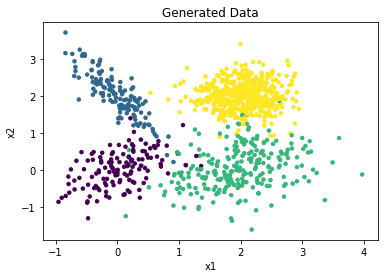

In [3]:
plt.scatter(GMM_X[:,0], GMM_X[:,1], c=GMM_y, s=12)
plt.title("Generated Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

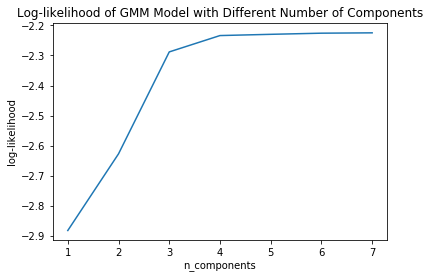

In [4]:
### Fit GMM Model
from sklearn.mixture import GaussianMixture

K = [1, 2, 3, 4, 5, 6, 7]

GMM_log_likelihood = [GaussianMixture(n_components=k).fit(X=GMM_X).score(X=GMM_X) for k in K]
plt.plot(K, GMM_log_likelihood)
plt.xlabel("n_components")
plt.ylabel("log-likelihood")
plt.title("Log-likelihood of GMM Model with Different Number of Components")
plt.show()

### Problem 3 (Bias-variance trade-off)

"The 5 samples placed between 0 and 1 on a regular grid with step 2" really confuses me. Is it \[0, 0.2, 0.4, 0.6, 0.8\], \[0.2, 0.4, 0.6, 0.8, 1.0\] or \[0, 0.2, 0.4, 0.6, 0.8, 1.0\]? Although the idea stays the same, the final plots have huge differences.

In [5]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)

def boo(x):
    t = np.sin(2 * np.pi * x) + np.cos(4 * np.pi * x)
    x2 = np.linspace(0, 1, 101)
    t2 = np.sin(2 * np.pi * x2) + np.cos(4 * np.pi * x2)

    M = np.arange(0, 16)
    SSE_train = []
    SSE_test = []
    for m in M:
        coef = np.polyfit(x, t, deg=m)
        t_pred = np.polyval(coef, x)
        SSE_train.append(np.sum((t_pred - t)**2))
        t_pred2 = np.polyval(coef, x2)
        SSE_test.append(np.sum((t_pred2 - t2)**2))
    
    plt.plot(M, SSE_train, label="train")
    plt.plot(M, SSE_test, label="test")
    plt.title("SSE of Train and Test Data")
    plt.xlabel("Degree of Polyfit")
    plt.ylabel("Sum of Squared Error")
    plt.legend()
    plt.show()

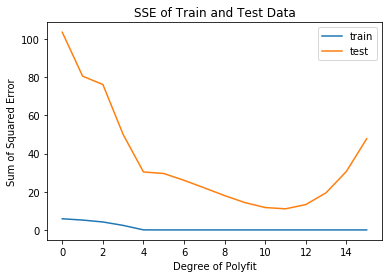

In [6]:
# [0, 0.2, 0.4, 0.6, 0.8, 1.0]
x = np.linspace(0, 1, 6)
boo(x)

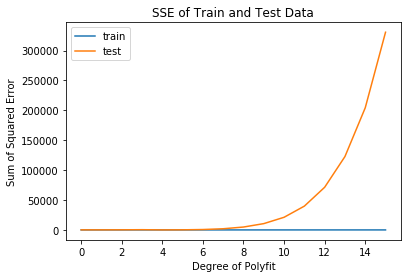

In [7]:
# [0, 0.2, 0.4, 0.6, 0.8]
x = np.linspace(0, 0.8, 5)
boo(x)

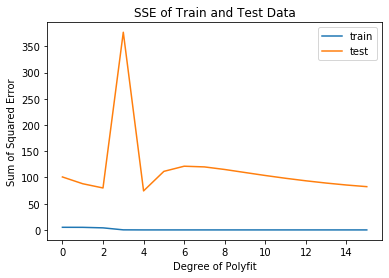

In [8]:
# [0.2, 0.4, 0.6, 0.8, 1.0]
x = np.linspace(0.2, 1, 5)
boo(x)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

def foo(x):
    M = 14
    lam = np.logspace(-2, 2, num=100)
    t = np.sin(2 * np.pi * x) + np.cos(4 * np.pi * x)
    x2 = np.linspace(0, 1, 101)
    t2 = np.sin(2 * np.pi * x2) + np.cos(4 * np.pi * x2)
    train = PolynomialFeatures(degree=M).fit_transform(x.reshape(-1, 1))
    test = PolynomialFeatures(degree=M).fit_transform(x2.reshape(-1, 1))

    SSE_train = []
    SSE_test = []
    for l in lam:
        ridge = Ridge(alpha=l).fit(train, t)
        SSE_train.append(np.sum((ridge.predict(train) - t) ** 2))
        SSE_test.append(np.sum((ridge.predict(test) - t2) ** 2))

    plt.plot(np.log(lam), SSE_train, label="train")
    plt.plot(np.log(lam), SSE_test, label="test")
    plt.title("SSE of Train and Test Data with L2-regularization")
    plt.legend()
    plt.xlabel('ln(lambda)')
    plt.ylabel('Sum of Squared Error')
    plt.show()

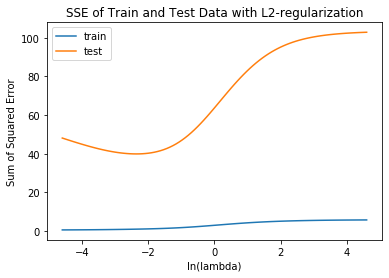

In [10]:
# [0, 0.2, 0.4, 0.6, 0.8, 1.0]
x = np.linspace(0, 1, 6)
foo(x)

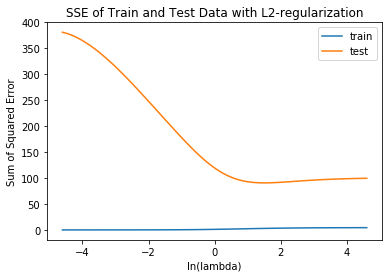

In [11]:
# [0, 0.2, 0.4, 0.6, 0.8]
x = np.linspace(0, 0.8, 5)
foo(x)

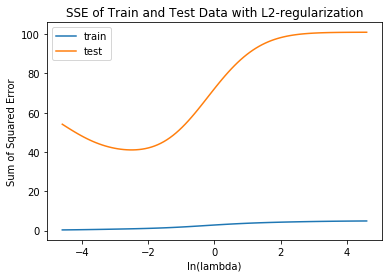

In [12]:
# [0.2, 0.4, 0.6, 0.8, 1.0]
x = np.linspace(0.2, 1, 5)
foo(x)

### Problem 4 (Maximum Likelihood Estimation of Marchenko-Pastur distribution)

We have,

$$
c_{\pm} = \sigma^2 (1 \pm \sqrt c)^2
$$

so we could derive

$$
\begin{aligned}
c_{+}c_{-} &= \sigma^4 (1-c)^2 \\
c_{+} + c_{-} &= 2 \, \sigma^2 (1 + c)
\end{aligned}
$$

We could rewrite the PDF of Marchenko-Pastur distribution into 

$$
\mu(x) = 
\begin{cases} 
    \frac{1}{2 \pi \sigma^2} \frac{\sqrt{-x^2 + 2x\sigma^2(c+1) - \sigma^4(1-c)^2}}{cx} & x \in [c_{-}, c_{+}] \\  
    0 & \text{elsewhere.}
\end{cases}
$$

Given $\mathbf{x} = (x_1, \ldots, x_n)$ are $n$ independent observations from the Marchenko-Pastur distribution, we can compute the log-likelihood function of it.

$$
\begin{aligned}
\log(\mu(\mathbf{x})) 
  &= \log(\prod_{i=1}^n \mu(x_i)) \\
  &= \sum_{i=1}^n \log(\mu(x_i)) \\
  &= -n\log\left\{2\pi\sigma^2\right\} + \sum_{i=1}^n \frac12 \log\left\{-x_i^2 + 2x_i\sigma^2(c+1) - \sigma^4(1-c)^2\right\} - \sum_{i=1}^n \log\left\{cx_i\right\} \\
\end{aligned}
$$

In order to derive the Maximum Likelihood Estimates of $c$ and $\sigma^2$, we take the partial derivative of the log-likelihood function with respect to $c$ and $\sigma^2$, and set them to 0.

For $c$ we have

$$
\begin{aligned}
0 = \frac{\partial {\log(\mu(\mathbf{x}))}}{\partial c}
  &= \sum_{i=1}^n \left[ \frac12 \frac{2x_i\sigma^2+2\sigma^4-2\sigma^4c}{-x_i^2 + 2x_i\sigma^2(c+1) - \sigma^4(1-c)^2} - \frac1c \right] \\
  &= \sum_{i=1}^n \frac{(2\sigma^4-2x\sigma^2-4\sigma^4)\,c+(2x_i^2-4x_i\sigma^2+2\sigma^4)}{2\,c\,(-x_i^2 + 2x_i\sigma^2(c+1) - \sigma^4(1-c)^2)}
\end{aligned}
$$

This gives us

$$
c = \frac1{\sigma^2} \frac{\sum_{i=1}^n (x_i-\sigma^2)^2}{n\sigma^2+\sum_{i=1}^n x_i}
$$

For $\sigma^2$ we have

$$
\begin{aligned}
0 = \frac{\partial {\log(\mu(\mathbf{x}))}}{\partial {\sigma^2}}
  &= \sum_{i=1}^n \left[ \frac12 \frac{2x_i+2x_ic-2(1-c)^2\sigma^2}{-x_i^2 + 2x_i\sigma^2(c+1) - \sigma^4(1-c)^2} - \frac1{\sigma^2}\right] \\
  &= \sum_{i=1}^n \frac{x_i^2 - x_i(c+1)\sigma^2}{2\,\sigma^2\,(-x_i^2 + 2x_i\sigma^2(c+1) - \sigma^4(1-c)^2)}
\end{aligned}
$$

This gives us

$$
\sigma^2 = \frac{\sum_{i=1}^n x_i^2}{\sum_{i=1}^n x_i} \frac{1}{c+1}
$$

By solving these 2 equations, we can derive the MLE of $c$ and $\sigma^2$:

$$
\begin{aligned}
c &= \frac{2 n\sum x^2}{n\sum x^2 + (\sum x)^2} - 1 = \frac{2\,\overline{x^2}}{\overline{x^2} + \overline x^2} - 1 \\
\sigma^2 &= \frac{n\sum x^2 + (\sum x)^2}{2\,n\sum x} = \frac{\overline{x^2} + \overline{x}^2}{2\,\overline x}
\end{aligned}
$$

where $\overline x^2 = \frac{1}{n^2} (\sum_{i=1}^n x_i)^2$ and $\overline{x^2} = \frac{1}{n} \sum_{i=1}^n x_i^2$

### Problem 5 (Minimizing Minkowski Loss)

We could first prove that for any given real-valued random variable $X \sim P_X$ and probability distribution $P_X(X = x) = f(x)$, the median of $P_X$ could minimize

$$
J(c) = E(|X-c|) = \int_\mathbb{R} |x-c| dP_X(x)
$$

We know 

$$
J(c) = \int_\mathbb{R} |x-c| dP_X(x) = \int_{-\infty}^{c} (c-x)f(x)dx + \int_c^{-\infty} (x-c)f(x)dx
$$

Then we take the derivative of $J$ with respect to $c$, and set it to 0.

$$
\begin{aligned}
\frac{dJ}{dc} & = (c-x)f(x) | _{x=c} + \int_{-\infty}^{c} f(x) dx + (x-c)f(x) | _{x=c} - \int_c^{\infty} f(x) dx \\
& = \int_{-\infty}^{c} f(x) dx - \int_c^{\infty} f(x) dx = 0
\end{aligned}
$$

This shows 

$$
\int_{-\infty}^{c} f(x) dx = \int_c^{\infty} f(x) dx
$$

which means $J$ has a a stationay point at $c = m$, where $m$ is the median of $J$.

It is easy easy to verify that $J(c) \geq J(m)$. Thus, it shows that by taking the value of the median of $P_X$, $J$ could reach its minimum. 

Now for the Minkowski Loss, we have

$$
\begin{aligned}
\mathbb{E}[L]
  &= \int \int L(t, y(\mathbf x)) p(\mathbf x, t) \, d\mathbf x dt \\
  &= \int p(\mathbf x) \int |t - y(\mathbf x)| \, p(t | \mathbf x) \, dt \, d\mathbf x \\
  &= \int p(\mathbf x) \int_{-\infty}^{y(\mathbf x)} (y(\mathbf x) - t) p(t | \mathbf x) \, dt \, d\mathbf x + \int p(\mathbf x) \int_{y(\mathbf x)}^{\infty} (t - y(\mathbf x)) p(t | \mathbf x) \, dt \, d\mathbf x
\end{aligned}
$$

Since we only cares about $y$ in the derivative, this could be seen as the same form of $J$. As we have proved above, $\mathbb{E}[L]$ is minimized when $y(\mathbf x)$ equals to the median of $p(t | \mathbf x)$.

As for the hit-or-miss loss function, we have

$$
\begin{aligned}
\mathbb{E}[L]
  &= \int \int L(t, y(\mathbf x)) p(\mathbf x, t) \, d\mathbf x dt \\
  &= \lim_{\delta \to 0} \int p(\mathbf x) \int_{-\infty}^{y(\mathbf x) - \delta} p(t | \mathbf x) \, dt \, d\mathbf x + \lim_{\delta \to 0} \int p(\mathbf x) \int_{y(\mathbf x) + \delta}^{\infty} p(t | \mathbf x) \, dt \, d\mathbf x \\
  &= \int p(\mathbf x) \int_{t \neq y(\mathbf x)} p(t | \mathbf x) \, dt \, d\mathbf x
\end{aligned}
$$

Let $s$ be the mode of $p(t | \mathbf x)$, we know that $p(s | \mathbf x) \geq p(t | \mathbf x) \,\,\text{for}\,\, \forall t \in \mathbb R$. Therefore, it is easy to see that $\mathbb{E}[L]$ is minimized when $y(\mathbf x) = s$.

### Problem 6 (Nonlinear Basis Functions)

In [13]:
### Generate Data
mu = np.array([0, 0])
sigma = np.array([[0.1, 0], [0, 0.1]])
pi = [0.5, 0.5]
mu2 = np.array([[-1, -1], [1, 1]])

GMM_1 = np.random.multivariate_normal(mean=mu, cov=sigma, size=100)
GMM_2_y = np.random.choice([0,1], size=200, p=pi)
GMM_2 = np.concatenate([np.random.multivariate_normal(mean=mu2[y], cov=sigma, size=1) for y in GMM_2_y])

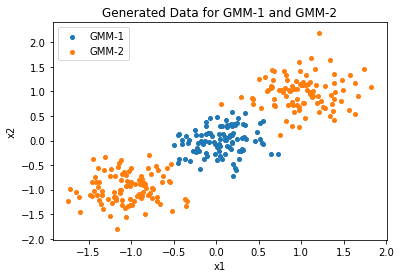

In [14]:
plt.scatter(GMM_1[:,0], GMM_1[:,1], label="GMM-1", s=16)
plt.scatter(GMM_2[:,0], GMM_2[:,1], label="GMM-2", s=16)
plt.legend()
plt.title("Generated Data for GMM-1 and GMM-2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

We could see that these two generated dataset could not be seperated by a single straight line.

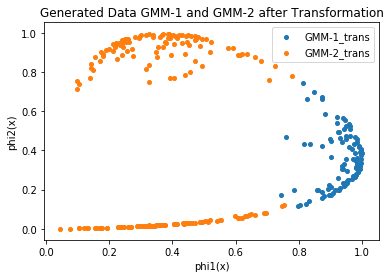

In [15]:
def phi1(x):
    mu = np.array([0, 0])
    return np.exp(-0.5 * np.sum((x - mu) * (x - mu), axis=1))

def phi2(x):
    mu = np.array([-1, -1])
    return np.exp(-0.5 * np.sum((x - mu) * (x - mu), axis=1))

GMM_1_trans = np.stack([phi1(GMM_1), phi2(GMM_1)], axis=1)
GMM_2_trans = np.stack([phi1(GMM_2), phi2(GMM_2)], axis=1)

plt.scatter(GMM_1_trans[:,0], GMM_1_trans[:,1], label="GMM-1_trans", s=16)
plt.scatter(GMM_2_trans[:,0], GMM_2_trans[:,1], label="GMM-2_trans", s=16)
plt.legend()
plt.title("Generated Data GMM-1 and GMM-2 after Transformation")
plt.xlabel("phi1(x)")
plt.ylabel("phi2(x)")
plt.show()

Now the transformed data are more seperable than before. It could be more easily seperated by a single straight line.